# Libraries

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os,sys
sys.path.append(os.path.abspath(os.path.join('..', 'utils')))
from data_explorer import DataExplorer

## Reading every dataset & 1rst EDA

In [5]:
df_2015 = pd.read_csv('../data/2015.csv')
df_2016 = pd.read_csv('../data/2016.csv')
df_2017 = pd.read_csv('../data/2017.csv')
df_2018 = pd.read_csv('../data/2018.csv')
df_2019 = pd.read_csv('../data/2019.csv')

In [9]:
print(f"2015 dataset columns: \n{list(df_2015.columns)} \n")
print(f"2016 dataset columns: \n{list(df_2016.columns)} \n")
print(f"2017 dataset columns: \n{list(df_2017.columns)} \n")
print(f"2018 dataset columns: \n{list(df_2018.columns)} \n")
print(f"2019 dataset columns: \n{list(df_2019.columns)} \n")

2015 dataset columns: 
['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual'] 

2016 dataset columns: 
['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Lower Confidence Interval', 'Upper Confidence Interval', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual'] 

2017 dataset columns: 
['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high', 'Whisker.low', 'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.', 'Freedom', 'Generosity', 'Trust..Government.Corruption.', 'Dystopia.Residual'] 

2018 dataset columns: 
['Overall rank', 'Country or region', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption'] 

2019 d

As we can see, we have different column names for each .csv file, so we need to change them to standard column names

# Column Standardization  
In this part of the notebook, we standardize all datasets and also add a 'year' column to distinguish the year for each row

In [6]:
columns = {
"Happiness Rank":"happiness_rank",
"Country":"country",
"Happiness Score":"happiness_score",
"Economy (GDP per Capita)":"GDP_per_capita",
"Health (Life Expectancy)":"life_expectancy",
"Freedom":"freedom",
"Trust (Government Corruption)":"perceptions_corruption",
"Generosity":"generosity"
}
df_2015.rename(columns=columns, inplace = True)
df_2015 = df_2015[["country", "happiness_rank", "happiness_score", "GDP_per_capita", "life_expectancy", 
                   "freedom", "perceptions_corruption", "generosity"]]
df_2015["year"] = 2015

In [7]:
columns = {
"Happiness Rank":"happiness_rank",
"Country":"country",
"Happiness Score":"happiness_score",
"Economy (GDP per Capita)":"GDP_per_capita",
"Health (Life Expectancy)":"life_expectancy",
"Freedom":"freedom",
"Trust (Government Corruption)":"perceptions_corruption",
"Generosity":"generosity"
}
df_2016.rename(columns=columns, inplace = True)
df_2016 = df_2016[["country", "happiness_rank", "happiness_score", "GDP_per_capita", "life_expectancy", 
                   "freedom", "perceptions_corruption", "generosity"]]
df_2016["year"] = 2016

In [8]:
columns = {
"Happiness.Rank":"happiness_rank",
"Country":"country",
"Happiness.Score":"happiness_score",
"Economy..GDP.per.Capita.":"GDP_per_capita",
"Health..Life.Expectancy.":"life_expectancy",
"Trust..Government.Corruption.":"perceptions_corruption",
"Freedom":"freedom",
"Generosity":"generosity"
}
df_2017.rename(columns=columns, inplace = True)
df_2017 = df_2017[["country", "happiness_rank", "happiness_score", "GDP_per_capita", "life_expectancy", 
                   "freedom", "perceptions_corruption", "generosity"]]
df_2017["year"] = 2017

In [9]:
columns = {
"Overall rank":"happiness_rank",
"Country or region":"country",
"Score":"happiness_score",
"GDP per capita":"GDP_per_capita",
"Healthy life expectancy":"life_expectancy",
"Freedom to make life choices":"freedom",
"Perceptions of corruption":"perceptions_corruption",
"Generosity":"generosity"
}
df_2018.rename(columns=columns, inplace = True)
df_2018 = df_2018[["country", "happiness_rank", "happiness_score", "GDP_per_capita", "life_expectancy", 
                   "freedom", "perceptions_corruption", "generosity"]]
df_2018["year"] = 2018

In [10]:
df_2019.drop(["Social support"], axis="columns", inplace=True)
columns = {
"Overall rank":"happiness_rank",
"Country or region":"country",
"Score":"happiness_score",
"GDP per capita":"GDP_per_capita",
"Healthy life expectancy":"life_expectancy",
"Freedom to make life choices":"freedom",
"Perceptions of corruption":"perceptions_corruption",
"Generosity":"generosity"
}
df_2019.rename(columns=columns, inplace = True)
df_2019 = df_2019[["country", "happiness_rank", "happiness_score", "GDP_per_capita", "life_expectancy", 
                   "freedom", "perceptions_corruption", "generosity"]]
df_2019["year"] = 2019

In [19]:
# merge all datasets into one
df = pd.concat([df_2015,df_2016,df_2017,df_2018,df_2019])

# Countries names Standardization  

The ISO2 code is a unique standard code assigned to every country worldwide.

Although the ISO3 code also exists, I chose to use ISO2 because it allowed for better data visualization on the world map with GeoPandas.

We also retrieved the official names for each country, as some country names were misspelled.

Finally, we added a new column called 'continent' because I believe this variable could influence the analysis and the model training phase.

In [20]:
import country_converter as coco

cc = coco.CountryConverter()

df['ISO2'] = df['country'].apply(lambda x: cc.convert(names=x, to='ISO2'))
df['country'] = df['country'].apply(lambda x: cc.convert(names=x, to='name_official'))
df['continent'] = df['country'].apply(lambda x: cc.convert(names=x, to='continent'))

In [21]:
# check for missing values
df.isnull().sum()

country                   0
happiness_rank            0
happiness_score           0
GDP_per_capita            0
life_expectancy           0
freedom                   0
perceptions_corruption    1
generosity                0
year                      0
ISO2                      0
continent                 0
dtype: int64

In [22]:
# show rows with missing values
rows_with_nulls = df[df.isnull().any(axis=1)]
rows_with_nulls


,country,happiness_rank,happiness_score,GDP_per_capita,life_expectancy,freedom,perceptions_corruption,generosity,year,ISO2,continent
19,United Arab Emirates,20,6.774,2.096,0.67,0.284,NaN,0.186,2018,AE,Asia


To fill in the missing values, we’re going to use linear interpolation, as the data follows a ranking, and nearby countries have similar values.

In [23]:
# Order the dataframe by country and year to apply the linear interpolation
df = df.sort_values(by=['country', 'year'])

# Apply linear interpolation directly using `transform` to retain the original index
df['perceptions_corruption'] = df.groupby('country')['perceptions_corruption'].transform(lambda group: group.interpolate(method='linear'))

# Verify that there are no more missing values
print(df[df['perceptions_corruption'].isnull()])



Empty DataFrame
Columns: [country, happiness_rank, happiness_score, GDP_per_capita, life_expectancy, freedom, perceptions_corruption, generosity, year, ISO2, continent]
Index: []


In [24]:
# export the merged and clean dataset
df.to_csv('../data/happiness_dataset_merged.csv', index=False, sep=',', encoding='utf-8')

# EDA for data Merged

In [25]:
explorer = DataExplorer('../data/happiness_dataset_merged.csv')
df = explorer.get_mini_eda_html()

As we can see, the null values correspond to the ISO2 code for Namibia, which is "NA." Therefore, pandas interprets this as a null value.

In [26]:
df['year'].unique()

array([2015, 2016, 2017, 2018, 2019])

C:\Users\ACER\AppData\Local\Temp\ipykernel_14384\3607462258.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='year', y='happiness_score', ax=axes[0], palette="Blues")
C:\Users\ACER\AppData\Local\Temp\ipykernel_14384\3607462258.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='year', y='perceptions_corruption', ax=axes[1], palette="Reds")


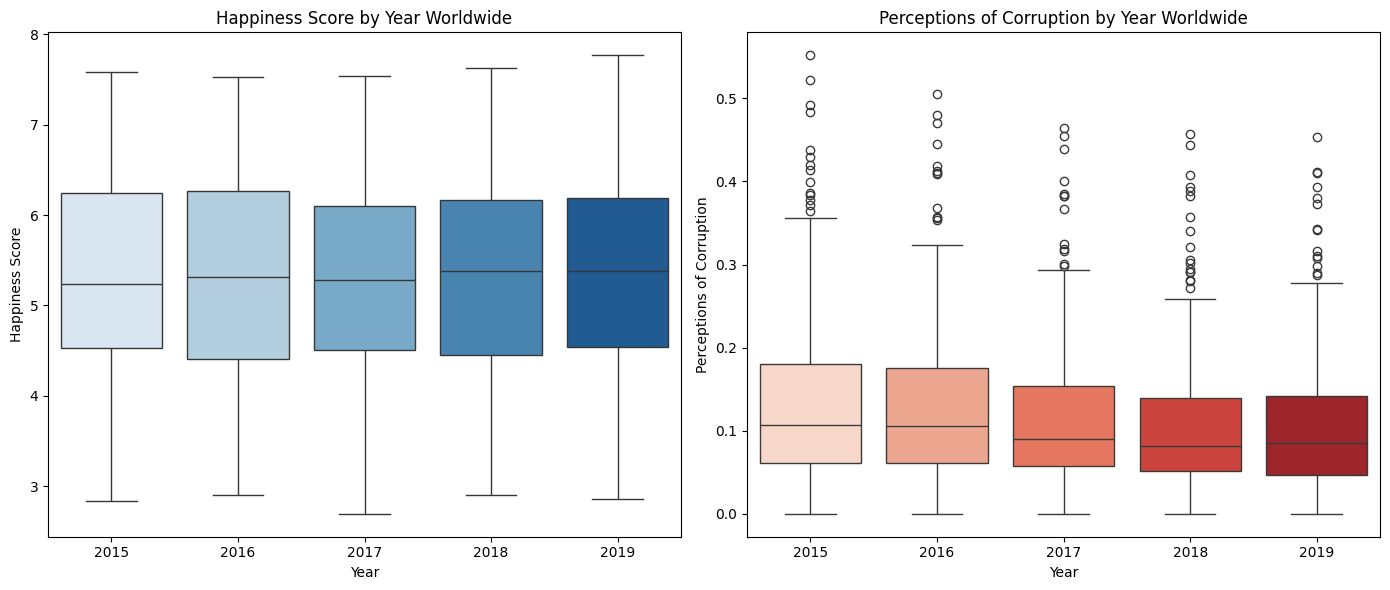

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot for Happiness Score
sns.boxplot(data=df, x='year', y='happiness_score', ax=axes[0], palette="Blues")
axes[0].set_title('Happiness Score by Year Worldwide')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Happiness Score')

# Boxplot for Perceptions of Corruption
sns.boxplot(data=df, x='year', y='perceptions_corruption', ax=axes[1], palette="Reds")
axes[1].set_title('Perceptions of Corruption by Year Worldwide')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Perceptions of Corruption')

# Avoid overlapping plot titles
plt.tight_layout()
plt.show()


Over the years, there has been a slight increase in the *happiness_score* worldwide. 

On the other hand, *perceptions_corruption* showed a decline until 2018, which indicates that the perception of corruption increased over the years, as lower values represent higher levels of perceived corruption. In 2019, it remained at levels similar to the previous year.

A notable characteristic of *perceptions_corruption* is the high number of outliers in the graphs, suggesting that some countries deviate significantly from the trend and achieve a lower perception of corruption. Additionally, 2018 stands out as the year with the highest number of outliers.

In [28]:
# Métricas descriptivas para happiness_score por año
happiness_stats = df.groupby('year')['happiness_score'].describe()
print("Descriptive statistics for Happiness Score by Year:")
print(happiness_stats)

# Métricas descriptivas para perceptions_corruption por año
corruption_stats = df.groupby('year')['perceptions_corruption'].describe()
print("\nDescriptive statistics for Perceptions of Corruption by Year:")
print(corruption_stats)


Descriptive statistics for Happiness Score by Year:
      count      mean       std    min      25%     50%      75%    max
year                                                                   
2015  158.0  5.375734  1.145010  2.839  4.52600  5.2325  6.24375  7.587
2016  157.0  5.382185  1.141674  2.905  4.40400  5.3140  6.26900  7.526
2017  155.0  5.354019  1.131230  2.693  4.50550  5.2790  6.10150  7.537
2018  156.0  5.375917  1.119506  2.905  4.45375  5.3780  6.16850  7.632
2019  156.0  5.407096  1.113120  2.853  4.54450  5.3795  6.18450  7.769

Descriptive statistics for Perceptions of Corruption by Year:
      count      mean       std  min       25%       50%       75%       max
year                                                                        
2015  158.0  0.143422  0.120034  0.0  0.061675  0.107220  0.180255  0.551910
2016  157.0  0.137624  0.111038  0.0  0.061260  0.105470  0.175540  0.505210
2017  155.0  0.123120  0.101661  0.0  0.057271  0.089848  0.153296  0.464

C:\Users\ACER\AppData\Local\Temp\ipykernel_14384\2779725037.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='year', y='life_expectancy', ax=axes[0], palette="Greens")
C:\Users\ACER\AppData\Local\Temp\ipykernel_14384\2779725037.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='year', y='freedom', ax=axes[1], palette="Purples")


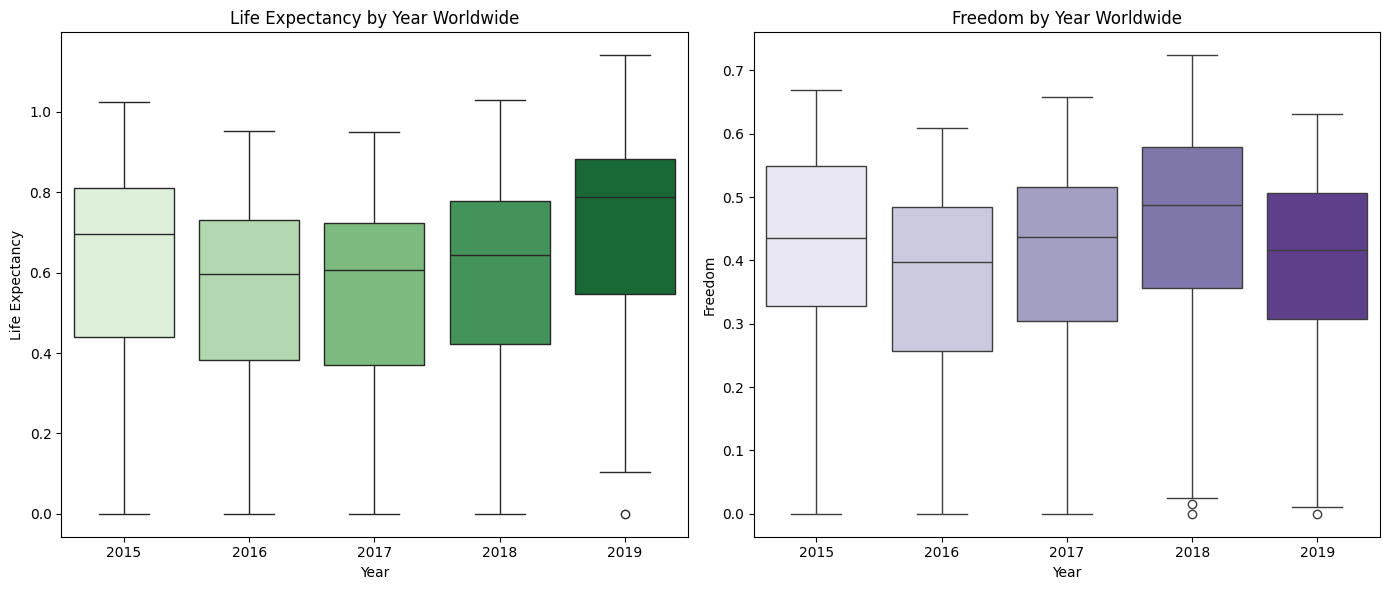

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot for Life Expectancy
sns.boxplot(data=df, x='year', y='life_expectancy', ax=axes[0], palette="Greens")
axes[0].set_title('Life Expectancy by Year Worldwide')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Life Expectancy')

# Boxplot for Freedom
sns.boxplot(data=df, x='year', y='freedom', ax=axes[1], palette="Purples")
axes[1].set_title('Freedom by Year Worldwide')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Freedom')

plt.tight_layout()
plt.show()


Life expectancy has shown consistent growth over the years since 2016. 

On the other hand, freedom also exhibited a similar increase in previous years, but in 2019, it appears to have stabilized or slightly decreased compared to 2018.

In [30]:
# descriptive statistics for life expectancy by year
life_expectancy_stats = df.groupby('year')['life_expectancy'].describe()
print("Descriptive statistics for Life Expectancy by Year:")
print(life_expectancy_stats)

# descriptive statistics for freedom by year
freedom_stats = df.groupby('year')['freedom'].describe()
print("\nDescriptive statistics for Freedom by Year:")
print(freedom_stats)

Descriptive statistics for Life Expectancy by Year:
      count      mean       std  min       25%       50%       75%       max
year                                                                        
2015  158.0  0.630259  0.247078  0.0  0.439185  0.696705  0.811013  1.025250
2016  157.0  0.557619  0.229349  0.0  0.382910  0.596590  0.729930  0.952770
2017  155.0  0.551341  0.237073  0.0  0.369866  0.606042  0.723008  0.949492
2018  156.0  0.597346  0.247579  0.0  0.422250  0.644000  0.777250  1.030000
2019  156.0  0.725244  0.242124  0.0  0.547750  0.789000  0.881750  1.141000

Descriptive statistics for Freedom by Year:
      count      mean       std  min       25%       50%       75%       max
year                                                                        
2015  158.0  0.428615  0.150693  0.0  0.328330  0.435515  0.549092  0.669730
2016  157.0  0.370994  0.145507  0.0  0.257480  0.397470  0.484530  0.608480
2017  155.0  0.408786  0.149997  0.0  0.303677  0.437454

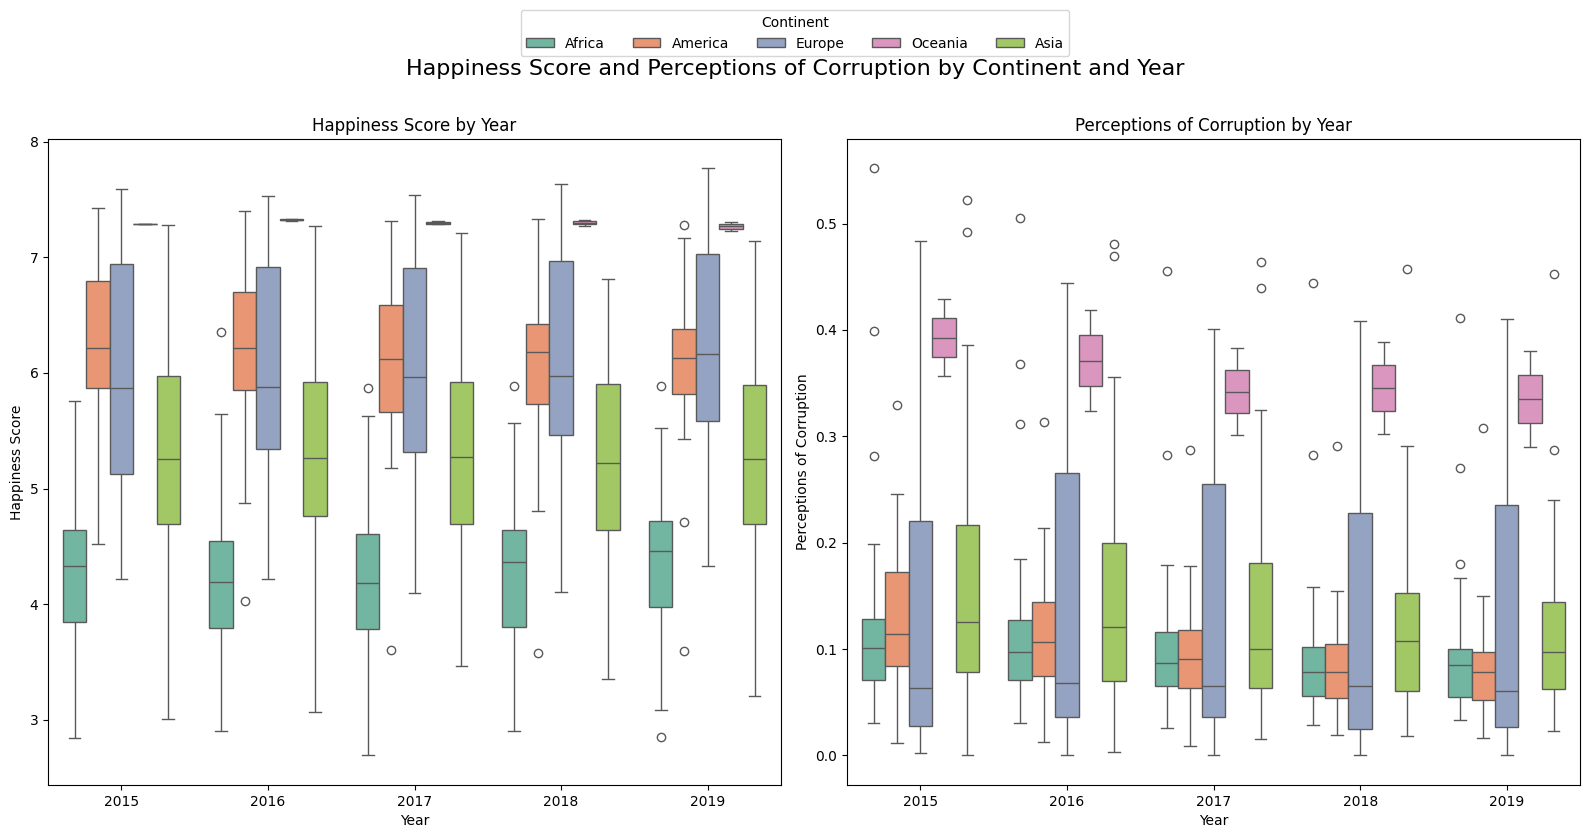

In [31]:
# Create figure and subplots with independent axes
fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharey=False)

# First plot (Happiness Score)
sns.boxplot(ax=axes[0], data=df, x='year', y='happiness_score', hue='continent', palette="Set2")
axes[0].set_title('Happiness Score by Year')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Happiness Score')

# Second plot (Perceptions of Corruption)
sns.boxplot(ax=axes[1], data=df, x='year', y='perceptions_corruption', hue='continent', palette="Set2")
axes[1].set_title('Perceptions of Corruption by Year')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Perceptions of Corruption')

# Remove individual legends from the subplots
axes[0].legend_.remove()
axes[1].legend_.remove()

# Add a single legend for the entire figure
handles, labels = axes[1].get_legend_handles_labels()
fig.legend(handles, labels, title='Continent', loc='upper center', ncol=len(labels), bbox_to_anchor=(0.5, 1.05))

# Add a main title
fig.suptitle('Happiness Score and Perceptions of Corruption by Continent and Year', fontsize=16)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.88)  # Adjust space for the main title
plt.show()

### Happiness Score
In the happiness_score, Africa has maintained a consistently low score over the years, although there is an outlier that reaches levels similar to those in America. 

Conversely, Oceania has shown consistently high happiness_scores over time with minimal variability, in contrast to Europe, which exhibits significant variability but generally maintains high scores. 

Asia, on the other hand, has mid-level scores with high variability. Finally, America demonstrates high variability over the years, but by 2019, its scores became more consistent, showing less variability compared to previous years while still maintaining high happiness_scores.

### Perceptions of Corruption
For perceptions_of_corruption, Africa and America present nearly identical distributions, reflecting a high perception of corruption (as lower values indicate higher perceived corruption). 

However, outliers in both continents indicate that some countries deviate from this trend. 

Oceania stands out as the continent with the lowest perception of corruption. Europe displays significant variability, covering countries with both high and moderately low perceptions of corruption. Asia shows a similar pattern to Europe, with a broad distribution indicating a mix of high and moderately low corruption perceptions.

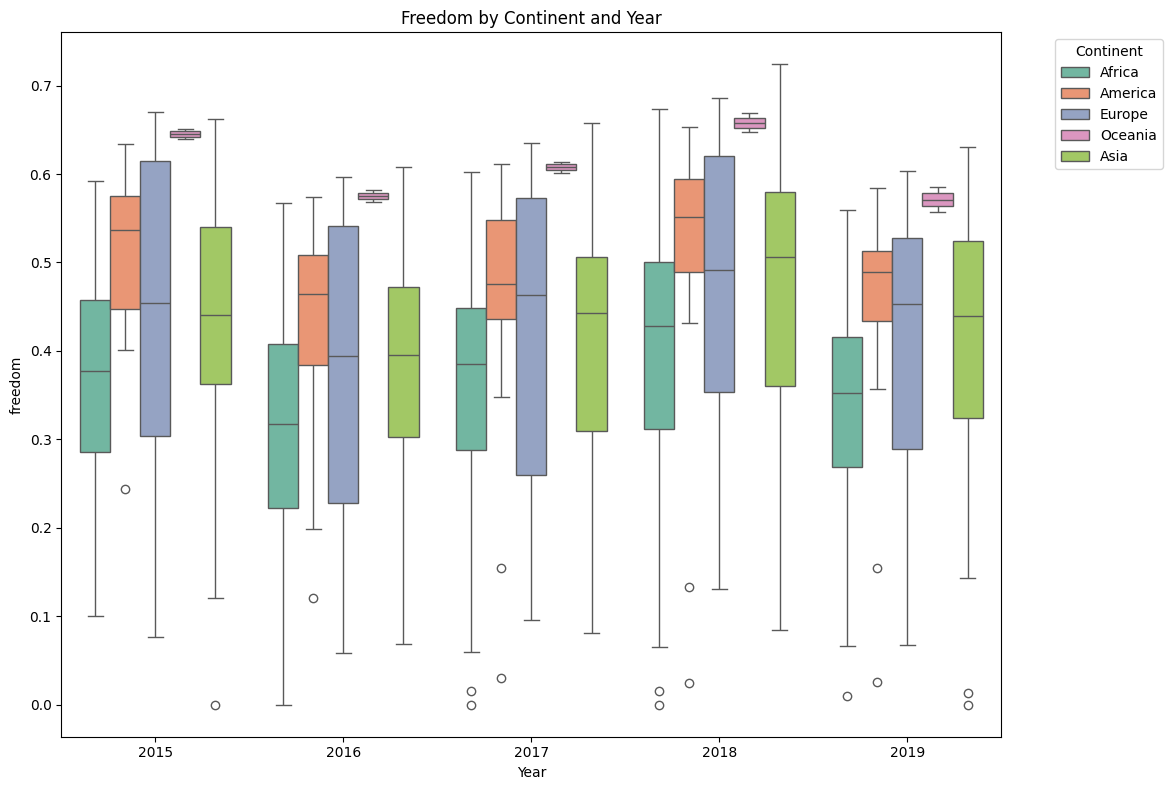

In [32]:
plt.figure(figsize=(14, 8))

sns.boxplot(data=df, x='year', y='freedom', hue='continent', palette="Set2")
plt.title('Freedom by Continent and Year')
plt.xlabel('Year')

plt.legend(title='Continent', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()


 
Overall, freedom showed an upward trend year-over-year across all continents. However, 2019 saw a notable decline in this metric across all continents.


Oceania consistently has the highest freedom scores, with minimal variability, indicating a stable perception of freedom. In contrast, Africa consistently scores the lowest, with significant variability and several countries reporting very low freedom values.
The Americas shows a more consistent distribution of freedom values compared to Africa, especially in the first three periods, maintaining higher scores overall.


Europe shows significant variability, with freedom scores ranging from levels similar to those in Africa to scores comparable to those in the Americas. This highlights a large disparity between European countries. Asia shows a similar trend to Europe, with substantial variability in freedom scores across the region.



In [33]:
from ww_gif_generator import *
create_happiness_gif()

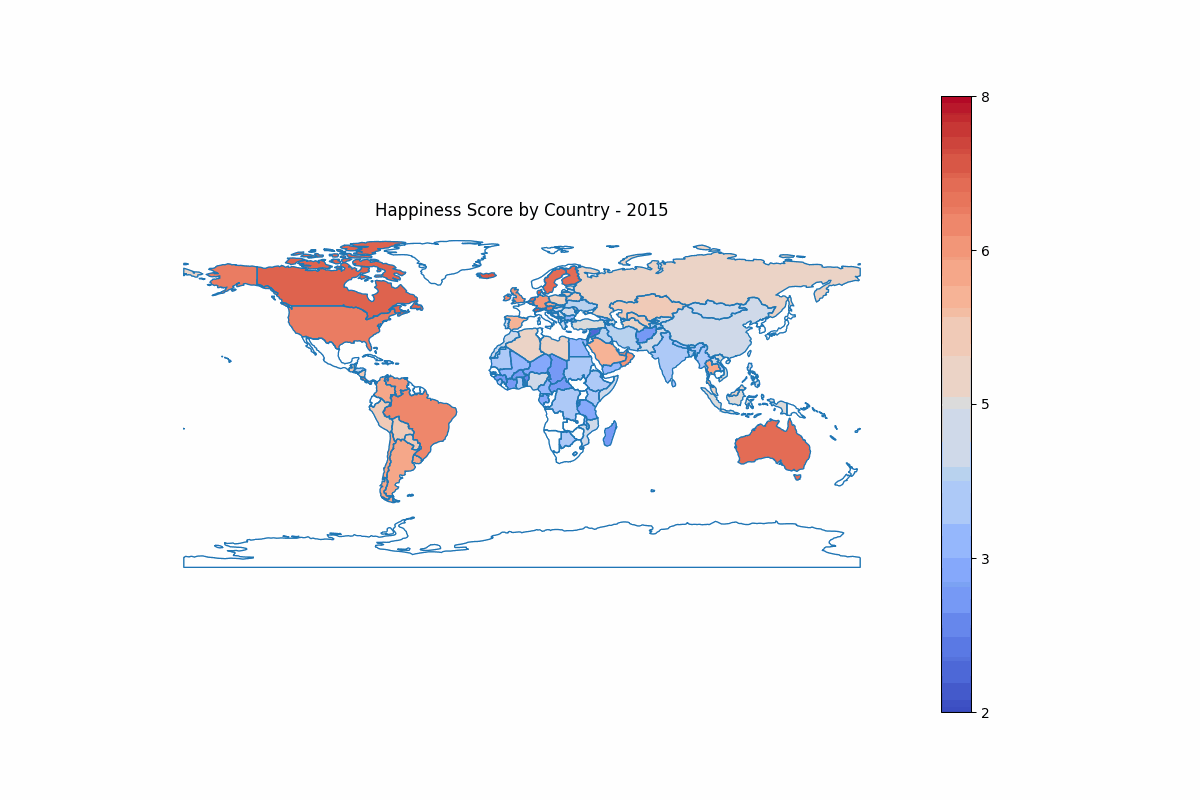

In [35]:
# show the gif
from IPython.display import Image
Image(filename="../visualizations/happiness_score_smooth.gif")